<a href="https://colab.research.google.com/github/ayushanand18/ocean-research-py/blob/main/notebooks/ayush's_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration
Let us explorate our data and bring out areas where we need to focus on in future.

## installing pyobis

In [2]:
try:
    import pyobis
except:
    %pip -q install pyobis
    import pyobis

Note: you may need to restart the kernel to use updated packages.


## importing other modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pyobis.occurrences import OccQuery

In [4]:
try:
    import cartopy
except:
    %pip -q install cartopy
    import cartopy

## grabbing some data

In [28]:
from matplotlib import rcParams
rcParams["figure.figsize"] = (18,10)

In [5]:
occ = OccQuery()

setting up environment variables

In [10]:
calanoida = dict(
    STARTDATE = "1999-01-01",
    ENDDATE = "2017-12-31",
    GEOMETRY = "POLYGON ((147.1875 -63.2679, 146.9532 -46.2996, 96.6797 -46.8631, 98.5547 -63.4779, 98.671 -63.4779, 147.1875 -63.2679))",
    STARTDEPTH = -2000,
    TAXON = 1100,
)

In [ ]:
df = occ.search(calanoida)

In [23]:
sea_butter = dict(
    STARTDATE = "1999-01-01",
    ENDDATE = "2017-12-31",
    GEOMETRY = "POLYGON ((45.0586 -42.0439, 18.6914 -42.5636, 18.5742 -55.0470, 46.8164 -55.3145, 45.0586 -42.0439))",
    STARTDEPTH = -2000,
    TAXON = 158030,
)

In [24]:
df_sb = occ.search(
    startdate = sea_butter["STARTDATE"],
    enddate = sea_butter["ENDDATE"],
#     geometry = sea_butter["GEOMETRY"],
    taxonid = sea_butter["TAXON"],
    startdepth = sea_butter["STARTDEPTH"]
)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 396/396
Fetched 396 records.


In [22]:
occ.get_search_url()

'https://api.obis.org/v3/occurrence?taxonid=158030&startdate=1999-01-01&enddate=2010-12-31&startdepth=-2000&offset=0&mof=False&size=384'

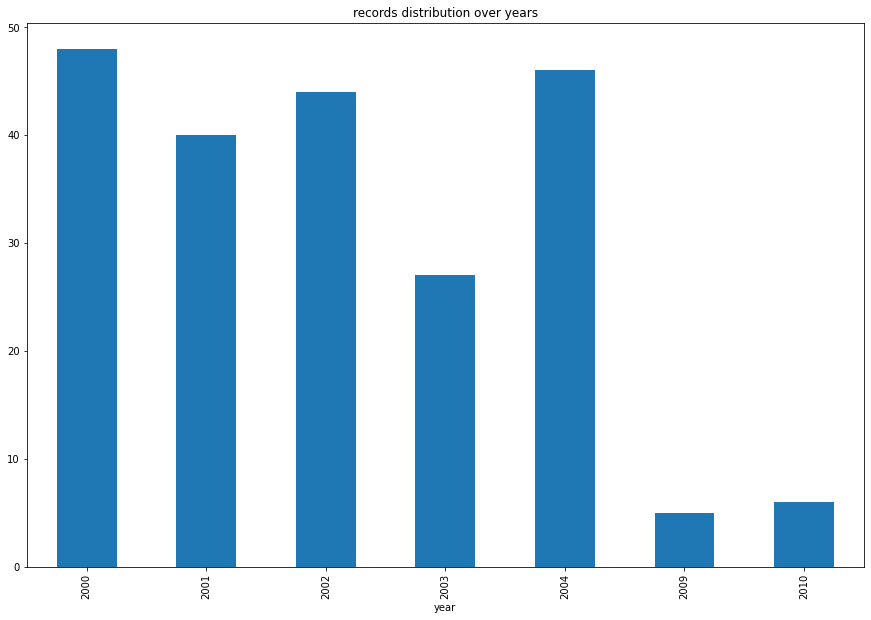

In [25]:
df_sb.groupby("year").scientificName.count().plot.bar(figsize=(15,10))
plt.title("records distribution over years");

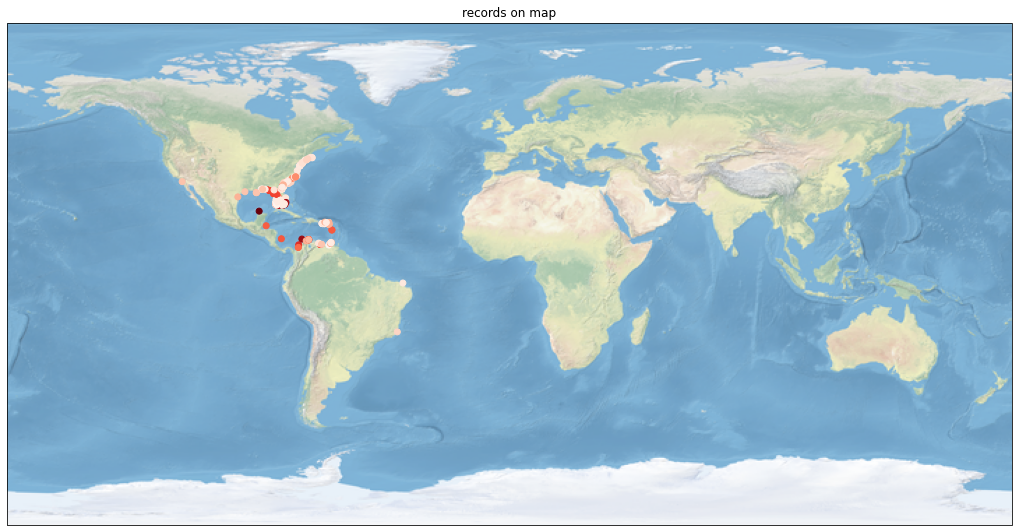

In [29]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.stock_img()

ax.scatter(x="decimalLongitude", y="decimalLatitude", c="date_mid", cmap="Reds", data=df_sb, transform=cartopy.crs.PlateCarree())
ax.set_title("records on map")

plt.show()

## Species to count
+ in west 
    + [ ] 126417 -> Clupea harengus Linnaeus
    + [ ] 126436 -> Gadus morhua Linnaeus
    + [ ] 126438 -> Merlangius merlangus
    + [ ] 126444 -> Trisopterus esmarkii
    + [ ] 126437 -> Melanogrammus aeglefinus
    + [ ] 126425 -> Sprattus sprattus
    + [ ] 127141 -> Platichthys flesus
    + [ ] 126792 -> Callionymus lyra Linnaeus
    + [ ] 126852 -> Trachurus trachurus
    + [ ] 110674 -> Meganyctiphanes Holt & Tattersall, high missing depth
+ in other parts
    + [ ] 274294 -> Microstomus pacificus, west US coast
    + [ ] 159581 -> Acanthurus coeruleus Bloch & Schneider
    + [ ] 110679 -> Thysanoessa Brandt, check below australia
+ some special mentions
    + [ ] 382879 -> Jasus edwardsii, numbers have declined over years
    + [ ] 106656 -> Oithona similis Claus, seems really weird and interesting
    + [ ] 127094 -> Xiphias gladius Linnaeus, less time range but good variety

## Species to not count
+ [x] Anatarctic Fur Seal -> no depth 0
+ [x] Sea Butterfly -> no depth 396/5 lakhs
+ [x] Eudyptula minor -> temporal dist poor